# **Cleaning Images**

We need a dataset to train our model. So we need to take some photographs that taken in real. Here we filter out those photographs before feed to our model.

You can use [fotor](https://www.fotor.com/photo-editor-app/editor/basic) online web base tool to manually crop and resize your images free.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## **Import neccesory libraries**

In [ ]:
import numpy as np
import cv2
from glob import glob
from tqdm import tqdm

## **Filter Images: by SIZE**

In [ ]:
def filter_images_by_size(images, min_size=768):
  output = []

  for img in tqdm(images, total=len(images)):
    x = cv2.imread(img, cv2.IMREAD_COLOR)

    hieght, width, channel = x.shape
    #print(x.shape)
    if hieght >= min_size and width >= min_size:
      output.append(img)

  return output


## **Filter Images: by LANDSCAPE**



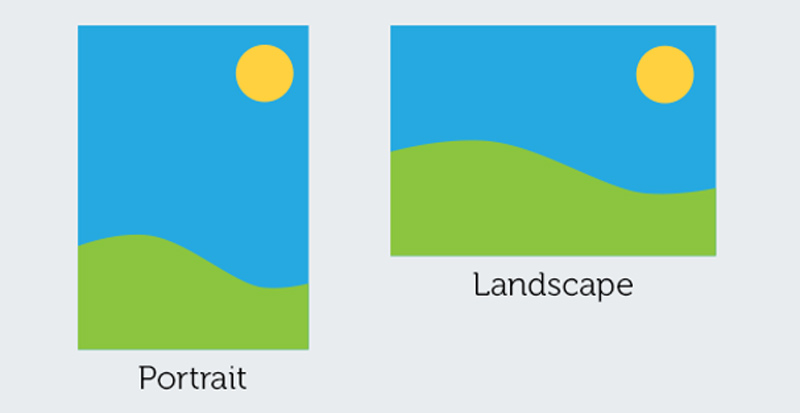

In [ ]:
def filter_images_by_landscape(images):
  output = []

  for img in tqdm(images, total=len(images)):
    x = cv2.imread(img, cv2.IMREAD_COLOR)

    height, width, channel = x.shape
    if height < width:
      output.append(img)

  return output

## **Resizing and saving the images**

In [ ]:
def save_images(images, save_path, size=(768,512)):   # size=(width, height)
  index = 1

  for path in tqdm(images, total=len(images)):
    x = cv2.imread(path, cv2.IMREAD_COLOR)

    # resize image 100% bigger.
    scale = 100
    height = int(x.shape[0] * scale / 100)
    width = int(x.shape[1] * scale / 100)
    dim = (width, height)
    x = cv2.resize(x, dim)

    if x.shape[0] >= size[1] and x.shape[1] >= size[0]:
      x = x[0:size[1], 0:size[0], :]
      #print(x.shape)

      cv2.imwrite(f"{save_path}/{index}.jpg", x)
      index += 1

## **Executing the program**

In [ ]:
raw_images = glob("/content/drive/MyDrive/Colab Notebooks/images/*.jpg")
print("Initial Images: ", len(raw_images))

Initial Images:  149


In [ ]:
output = filter_images_by_size(raw_images, min_size=512)
print("Filter by size: ", len(output))

100%|██████████| 149/149 [00:03<00:00, 46.77it/s]

Filter by size:  149


In [ ]:
output = filter_images_by_landscape(output)
print("Filter by landscape: ", len(output))

100%|██████████| 149/149 [00:01<00:00, 76.73it/s]

Filter by landscape:  149


In [ ]:
save_images(output, "/content/drive/MyDrive/Colab Notebooks/clean images")

100%|██████████| 149/149 [00:04<00:00, 33.65it/s]
